In [1]:
###


In [47]:
##Choose Channel

import ipywidgets as widgets
Channel=widgets.RadioButtons(
    options=['Channel 1.1', 'Channel 1.2', 'Channel 1.3', 'Channel 1.4', 'Channel 2.1', 'Channel 2.2', 'Channel 2.3', 'Channel 2.4'],
    #value='pineapple', # Defaults to 'pineapple'
    layout={'width': 'max-content'}, # If the items' names are long
    description='Choose Channel:',
    disabled=False)
Channel

RadioButtons(description='Choose Channel:', layout=Layout(width='max-content'), options=('Channel 1.1', 'Chann…

C:\Users\Karabo Mogotlane\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1105667


C:\Users\Karabo Mogotlane\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


filteres [2.88706095e-13 5.78916713e-12 5.79674060e-11 ... 5.90044840e-01
 5.89670693e-01 5.89566599e-01]


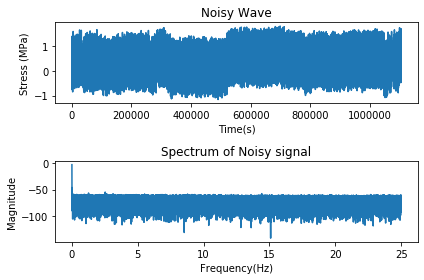

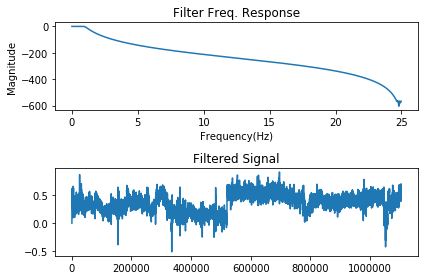

In [145]:
## Read data and Filter it

import matplotlib.pyplot as plt
import numpy as np
from math import pi
import scipy.fftpack as sf
import scipy.signal as sig
import rainflow
import pandas

ChannelList=['Channel 1.1', 'Channel 1.2', 'Channel 1.3', 'Channel 1.4']
#Day 1
Channel1A =pandas.read_csv('01-05-2020_02-37-05-347.csv',delimiter=';')
Channel2A =pandas.read_csv('01-05-2020_08-37-05-385.csv',delimiter=';')
Channel3A =pandas.read_csv('01-05-2020_14-37-05-408.csv',delimiter=';')
Channel4A =pandas.read_csv('01-05-2020_20-37-05-448.csv',delimiter=';')

#Combine day 1

y1A=Channel1A[Channel.value]
y2A=Channel2A[Channel.value]
y3A=Channel3A[Channel.value]
y4A=Channel4A[Channel.value]


yA=np.concatenate((y1A,y2A,y3A))
yA=np.concatenate((yA,y4A))

Channel1B =pandas.read_csv('02-05-2020_02-37-05-486.csv',delimiter=';')
Channel1B = Channel1B.iloc[:5]
Channel2B =pandas.read_csv('02-05-2020_08-37-05-508.csv',delimiter=';')
Channel2B = Channel2B.iloc[:5]
Channel3B =pandas.read_csv('02-05-2020_14-37-05-545.csv',delimiter=';')
Channel3B = Channel3B.iloc[:5]
Channel4B =pandas.read_csv('02-05-2020_20-37-05-566.csv',delimiter=';')
Channel4B = Channel4B.iloc[:5]

#Combine day 2

y1B=Channel1B[Channel.value]
y2B=Channel2B[Channel.value]
y3B=Channel3B[Channel.value]
y4B=Channel4B[Channel.value]

#yB=y1B+y2B+y3B+y4B
yA=np.concatenate((yA,y1B,y2B))
yA=np.concatenate((yA,y3B,y4B))

#Day 3
Channel1C =pandas.read_csv('03-05-2020_02-37-05-588.csv',delimiter=';')
Channel2C =pandas.read_csv('03-05-2020_08-37-05-626.csv',delimiter=';')
Channel3C =pandas.read_csv('03-05-2020_14-37-05-666.csv',delimiter=';')
Channel4C =pandas.read_csv('03-05-2020_20-37-05-687.csv',delimiter=';')

#Combine day 3
y1C=Channel1C[Channel.value]
y2C=Channel2C[Channel.value]
y3C=Channel3C[Channel.value]
y4C=Channel4C[Channel.value]

yA=np.concatenate((yA,y1C,y2C))
yA=np.concatenate((yA,y3C,y4C))

#Day 4
Channel1D =pandas.read_csv('04-05-2020_02-37-05-726.csv',delimiter=';')
Channel2D =pandas.read_csv('04-05-2020_08-37-05-748.csv',delimiter=';')
Channel3D =pandas.read_csv('04-05-2020_14-37-05-788.csv',delimiter=';')
Channel4D =pandas.read_csv('04-05-2020_20-37-05-809.csv',delimiter=';')

#Day 1 A
y1D=Channel1D[Channel.value]
y2D=Channel2D[Channel.value]
y3D=Channel3D[Channel.value]
y4D=Channel4D[Channel.value]

#yD=y1D+y2D+y3D+y4D

#print(len(yD))
yA=np.concatenate((yA,y1D,y2D))
yA=np.concatenate((yA,y3D,y4D))

yZ=yA
print(len(yZ))
yZ=yZ.tolist()

#generate a matrix of seq, x,y ; sequence, time and stresses
TimeLength=len(yZ)
seq=[round(x,1) for x in range(1, TimeLength+1)]
x1= [round(x*0.05,3) for x in range(0, TimeLength)]
data={'seq':seq,'x':x1,'y':yZ}
data = pandas.DataFrame(data, columns=['seq','x', 'y'])
#data['y']= data['y'].str.replace('-', '')
data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
x = data.x.tolist()
y = data.y.tolist()

if Channel.value in ChannelList :
    Corr=0.1840265*0.207
    y = [x*Corr for x in y if str(x) !='nan']
else:
    corr=0.4784689*0.207
    y = [x*Corr for x in y if str(x) !='nan']
#bool_series = pd.notnull(data["Gender"])
yP = y
# Generate a signal
Fs = 50;
t = 4;
#n = np.arange(0,t,1/Fs)
l = np.size(y)
n = np.arange(0,l,1)
#f = 3;
#x = np.sin(2*pi*f*n)
# Generate a noise
#y = np.random.normal(0, 0.2, np.size(x)); # AWGN
#x = x + y; # noisy signal

plt.figure(1)
plt.subplot(2,1,1)
plt.plot(n,yP); plt.title('Noisy Wave')
plt.xlabel('Time(s)'); plt.ylabel('Stress (MPa)')

# Take spectral analysis
# calculating the fft
X_f = abs(sf.fft(yP))
l = np.size(y)
fr = (Fs/2)*np.linspace(0,1,l//2)
xl_m = (2/l)*abs(X_f[0:np.size(fr)]);
plt.subplot(2,1,2)
plt.plot(fr,20*np.log10(xl_m)); plt.title('Spectrum of Noisy signal')
plt.xlabel('Frequency(Hz)'); plt.ylabel('Magnitude')
plt.tight_layout()

# Create a BPF
o = 10;
fc = np.array([1]) #Cut Off Frequncy
wc = 2*fc/Fs;
[b,a] = sig.butter(o, wc, btype = 'lowpass')

# filter response
[W,h] = sig.freqz(b,a, worN=1024)

W = Fs* W/(2*pi)

plt.figure(3)
plt.subplot(2,1,1)
plt.plot(W, 20*np.log10(h)); plt.title('Filter Freq. Response')
plt.xlabel('Frequency(Hz)'); plt.ylabel('Magnitude')

# Filter signal
x_filt = sig.lfilter(b,a, y)
print('filteres',x_filt)
plt.subplot(2,1,2)
plt.plot(n,x_filt); plt.title('Filtered Signal')
plt.tight_layout();

TimeLength=len(x_filt)
seq=[round(x,1) for x in range(1, TimeLength+1)]
x2= [round(x*0.05,3) for x in range(0, TimeLength)]
Filtered={'seq':seq,'xf':x2,'yf':x_filt}
Filtered= pandas.DataFrame(Filtered, columns=['seq','xf', 'yf'])

Range_   0.011  0.015  0.016  0.017  0.025  0.030  0.031  0.032  0.033  0.034  \
Mean_                                                                           
-0.0740    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
-0.0655    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
-0.0590    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
-0.0590    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
-0.0550    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
 0.6315    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 0.6330    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 0.6340    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 0.6350    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 0.6355    NaN    NaN    NaN

C:\Users\Karabo Mogotlane\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Karabo Mogotlane\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


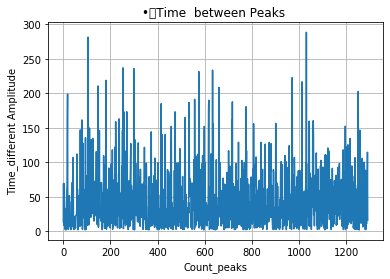

C:\Users\Karabo Mogotlane\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Karabo Mogotlane\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


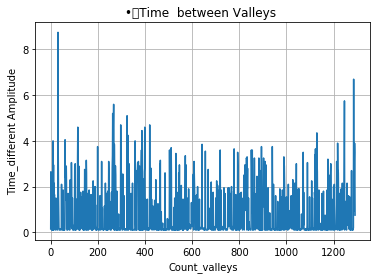

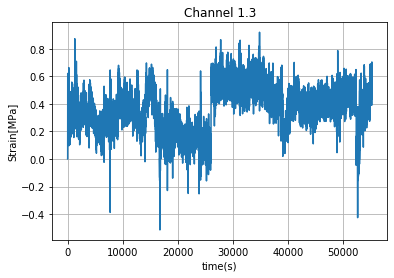

The damage is 9.811837787151892e-09 %,  Based on 50 % probability of survival
The damage is 2.2958862108867318e-08 %,  Based on 97.7 % probability of survival


In [146]:
#Rainflow Counting
""""Signal=x_filt
Signal=Signal.tolist()
#generate a matrix of seq, x,y ; sequence, time and stresses
TimeLength=len(yZ)
seq=[round(x,1) for x in range(1, TimeLength+1)]
x1= [round(x*0.05,3) for x in range(0, TimeLength)]
data={'seq':seq,'x':x1,'y':yZ}
data = pandas.DataFrame(data, columns=['seq','x', 'y'])"""

#colnames = ['seq', 'x', 'y']
#data = pandas.read_csv('sample_data.csv', names=colnames, header = 7)
#data = pandas.read_csv('Channel1.csv',names=colnames, header = 2)

x = Filtered.xf.tolist()
y = round(Filtered['yf'],3).tolist()
# Rainflow Count Algorithm

#val = rainflow.count_cycles(y,3, True, True)
# Function count_cycles returns a sorted list of the load ranges and the corresponding number of cycles
# 3 decimal digits is used for precision
val = rainflow.count_cycles(y, 3)

#print("Output (Range,Cycles) = ", val)
# Mean, Range , Cycle Count list use to store each point in 3-Dimension
mn = []
rg = []
z = []

# Detailed output, like cycle lows, highs or means, use extract_cycles
for low, high, mult in rainflow.extract_cycles(y, True, True):
    mean = 0.5 * (high + low)
    # Append Of The mean List
    mn.append(mean)
    rng = high - low
    # Append Of The Range List
    rg.append(rng)

# Create a Data Frame using panda to better manage the list of range and cycle counts
# generated from rainflow.count_cycles function

d1 = {'range_cycles': val}
df2 = pandas.DataFrame(d1)
df2[['range', 'cycles']] = pandas.DataFrame(df2.range_cycles.values.tolist(), index=df2.index)

liss = df2[['range']].values.flatten()
liss2 = df2[['cycles']].values.flatten()

# Using the detail output of rainflow.extract_cycles function, extract the corresponding mean values in a list
new_range = []
new_mean = []
new_cycle = []

# For loop to extract the corresponding mean values
for xr in range(len(rg)):
    for xv in range(len(val)):
        if rg[xr] == liss[xv]:
            new_range.append(liss[xv])
            new_mean.append(mn[xr])
            new_cycle.append(liss2[xv])

matrix_list = [new_range, new_mean, new_cycle]
#print(matrix_list)
df = pandas.DataFrame({'Mean_': new_mean, 'Range_': new_range, 'z': new_cycle})

# create pivot table with x(Range) rows, y(Mean)columns, z as values
lists = df.pivot_table(values='z', index='Mean_', columns='Range_')

# Print the pivot table in the ide
print(lists)

# Write the Pivot table matrix in an excel(CSV) file: output_Test_Manual_sample.csv
finaldf = pandas.DataFrame(lists)
finaldf.to_csv('Output_Real_Sample.csv', index=True, header=True)

# To calculate the time between each peak and valley
lenght = len(y)
peak_position = []
time_diff_peak = []

for cc in range(lenght):
    if ((y[cc]>y[cc-1]) and ((cc+1)<lenght)):
            if (y[cc +1]< y[cc]):
                peak_position.append(x[cc])
            else:
                cc = cc + 1
for pt in range(len(peak_position)):
    if(pt+1)< (len(peak_position)):
        time_diff_peak.append(round (( peak_position[pt+1] - peak_position[pt]),2 ))
#print("Time Difference Between Peaks", time_diff_peak)
valley_position = []
time_diff_valley = []

for vv in range(1, lenght, 1):
    if y[vv] > y[vv - 1] and vv+1 < lenght:
        if y[vv+1] > y[vv]:
            vv = vv + 1
        else:
            valley_position.append(x[vv-1])
for vt in range(len(valley_position)):
    if(vt+1) < (len(peak_position)):
        time_diff_valley.append(round((valley_position[vt+1] - valley_position[vt]), 2))
#print("Time Difference Between Valleys", time_diff_valley)
gg = []
for g in range(len(time_diff_peak)):
    gg.append(g)
plt.plot(gg, time_diff_peak)
plt.xlabel('Count_peaks')
plt.ylabel('Time_different Amplitude')
plt.title('•	Time  between Peaks ')
plt.grid(True)
plt.show()

ll = []
for l in range(len(time_diff_valley)):
    ll.append(l)

plt.plot(ll, time_diff_valley)
plt.xlabel('Count_valleys')
plt.ylabel('Time_different Amplitude')
plt.title('•	Time  between Valleys ')
plt.grid(True)
plt.show()



# Convert the concatenated matrix into a list and Plot the raw Stress vs time
yZ=yA
yZ=yZ.tolist()
#generate a matrix of seq, x,y ; sequence, time and stresses
TimeLength=len(yZ)
seq=[round(x,1) for x in range(1, TimeLength+1)]
x1= [round(x*0.05,3) for x in range(0, TimeLength)]
data={'seq':seq,'x':x1,'y':yZ}
data = pandas.DataFrame(data, columns=['seq','x', 'y'])

#colnames = ['seq', 'x', 'y']
#data = pandas.read_csv('sample_data.csv', names=colnames, header = 7)
#data = pandas.read_csv('Channel1.csv',names=colnames, header = 2)

#x = data.x.tolist()
#y = data.y.tolist()
#Plot the stresses
plt.plot(x, y)
plt.xlabel('time(s)')
plt.ylabel('Strain[MPa]')
plt.title(Channel.value)
plt.grid(True)
plt.show()

#Compute the damage
# 50% probability of failure
# LogCo=12.6007, d = 0, m = 3, delta = 0.2095 weld class D
damage1 = 0
damage2 = 0

if Channel.value in ChannelList :
    for num1, num2 in zip(df2['range'], df2['cycles']):
        Nfw=10**(11.5662-3*np.log10(num1))
        Ni = (num2/Nfw)*100
        damage1=damage1+Ni
else:
     for num1, num2 in zip(df2['range'], df2['cycles']):
        Nfw=10**(12.0900-3*np.log10(num1))
        Ni = (num2/Nfw)*100
        damage1=damage1+Ni
print('The damage is',damage1,'%,',' Based on 50 % probability of survival') 
#97.7% probability of survival
if Channel.value in ChannelList :
    for num1, num2 in zip(df2['range'], df2['cycles']):
        Nfw=10**(11.5662-0.1846*2-3*np.log10(num1))
        #print(Nfw)
        Ni = (num2/Nfw)*100
        #print(Ni)
        damage2=damage2+Ni
else:
    for num1, num2 in zip(df2['range'], df2['cycles']):
        Nfw=10**(12.090-0.2279*2-3*np.log10(num1))
        #print(Nfw)
        Ni = (num2/Nfw)*100
        #print(Ni)
        damage2=damage2+Ni
print('The damage is',damage2,'%,',' Based on 97.7 % probability of survival') 



In [60]:
kk=(1/damage2)*5
kk

963702.1324017056

In [61]:
kk/365

2640.2798147991934

In [62]:
kk=(1/damage1)*5
kk/365

6928.671249719694